# The Julia set

## Definition of Julia set

Define a discrete-time dynamical system $z_{n+1} = f(z_n)$ where $f(z) = z^2 + c^2$, 
where $z$ is a variable on the complex plane and $c$ is a complex constant. 

The (filled) Julia set $J(f)$ is the set of points $z$ that remain bounded under iteration of 
$f$, i.e. those points $z$ for which $f^n(z)$ remains bounded as $n \rightarrow \infty$.

## Calculating and visualizing the Julia set

To make a computer model of the Julia set, we choose and fix a value of $c$. Then we sweep
over some region of the complex plane, for every point $z$ computing $z_n = f^n(z)$ for
some large value $n=n_{max}$ and we see if $z_n$ looks like it's running off to infinity, or 
if it looks  bounded. If a given point $z$ looks like it remains bounded, we say it 
belongs to the Julia set $J(f)$.

### The escape time

There's an good way to make this determination of boundedness that also provides a beautiful
visualization of a Julia set. You can show that any iterate $z_n$ that is farther from the
origin than $R = (1 + \sqrt{1+4|c|})/2$ will shoot off to infinity under further iteration.
So as we iterate forward we check every value of $z_n$ and see if it's farther from the origin
than $R$. We call the value of $n$ for which $z_n$ goes beyond $R$ the *escape time* for point
$z$. 

Here's a Julia function to calculate the escape time of a given value of $z$, under iteration
$z_n = f^n(z)$ for $f(z) = z^2-c$. If the point hasn't escaped by $n=n_{max}$, we call that
escape time $n_{max}$ anyway, and we interpret that to mean the escape time is effectively
infinite, so the point belongs in the Julia set.

In [18]:
using Plots

function escapetime(z, c, nmax, R) 
    for n in 0:nmax-1
        if abs(z) > R
            return n + 1 - log(log(abs(z))/log(R)) # this smooths the color plots, compared to returning just n
        end      
        z = z^2 + c
    end
    return nmax
end

escapetime (generic function with 1 method)

Now we make a color plot of escape time as a function of $z$.

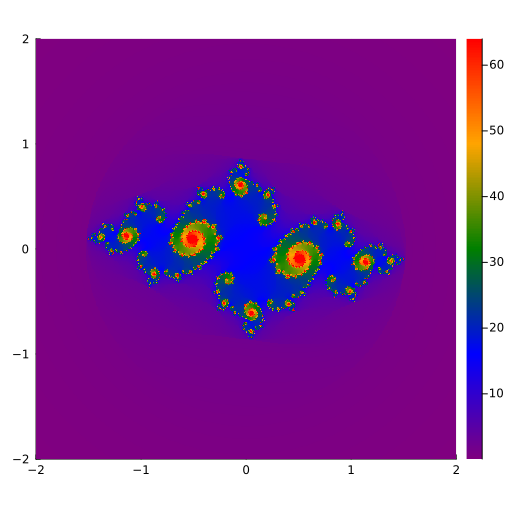

In [19]:
# parameters to define f(z) = z^2 + c and to 
α = 2.9
c = 0.7885*exp(α*im)
R = (1+sqrt(1+4abs(c)))/2  # ensures R^2 - R ≥ c

# parameters for making escape-time plot
nmax = 64    # maximum number of iterations for escape-time computation
Ngrid = 512  # number of pixels
w = 2        # width of plot, both real and imaginary axes

# define a grid of points along real and imaginary axes 
realgrid = range(-w,w,Ngrid)
imaggrid = range(-w,w,Ngrid)

# compute escape time over grid z = a + bi
escape = [escapetime(a+b*im, c, nmax, R) for b in imaggrid, a in realgrid]

# plot escape time as colormap over z
fig1 = heatmap(realgrid, imaggrid, escape, aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), c=:rainbow, size=(520,520))

In the above plot, places in brightest red have escape time $n_{max}$ 
and so are in our finite approximation to the Julia set. 

## Things to try

  * changing $c$ in $f(z) = z^2 + c$
  * changing `nmax`
  * changing the colormap
  * zooming in on a region by changing `realgrid` and `imaggrid`

## Questions to address

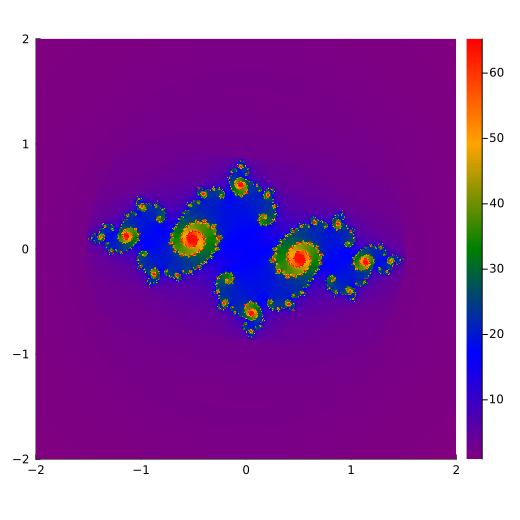

In [3]:
# replot figure 1 to illustrate some curiosities and questions
plot(fig1)

You can see a few curious things in the plot of this Julia set. 
The whole figure seems to have a kind of up-down, left-rght symmetry. 

**Question 1:** What is this symmetry? 

**Question 2:** Why does the figure have this symmetry?

Also, the points within the Julia set, the red regions, seem to be circles
centered on certain points.

**Question 3:** What are these points? Can you think of an equation
involving $z$ and $f(z)$ that would guarantee $f^n(z)$ remains bounded 
as $n$ goes to infinity? 

**Question 4:** Given an answer to question 3, can you solve that equation
for $z$ and determine the centers of the Julia set?

## Hints

Some hints through code and pictures.

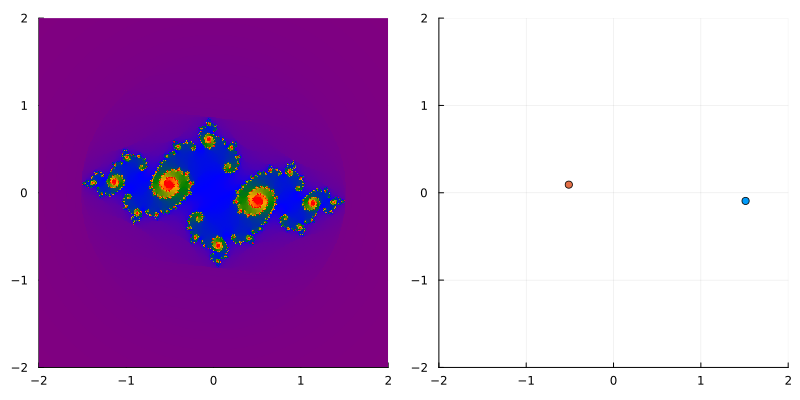

In [20]:
f(z,c) = z^2 + c

roots  = [(1 + sqrt(1 - 4c))/2 (1 - sqrt(1 - 4c))/2]

fig3 = plot(fig1, colorbar=:none)
fig4 = scatter(real(roots), imag(roots), aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="")
plot(fig3,fig4, size=(800,400))

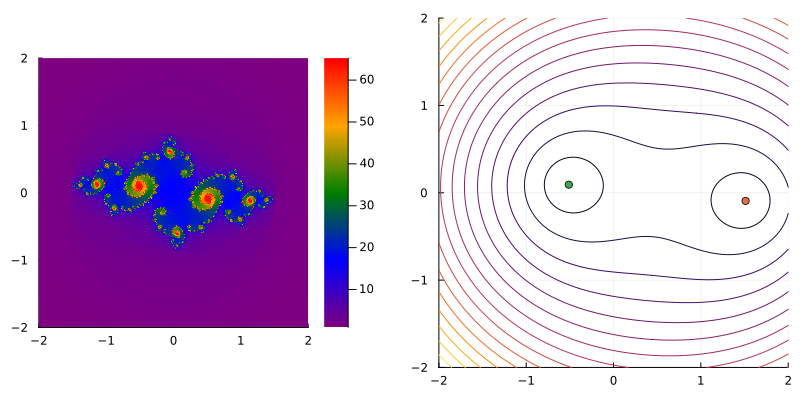

In [9]:
orbiterror(z,c) = abs(f(z, c) - z)
orberr = [orbiterror(a + b*im, c) for b in imaggrid, a in realgrid]

contour(realgrid, imaggrid, orberr, aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="", colorbar=:none)
fig5 = scatter!(real(roots), imag(roots), aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="")
plot(fig1,fig5,size=(800,400))

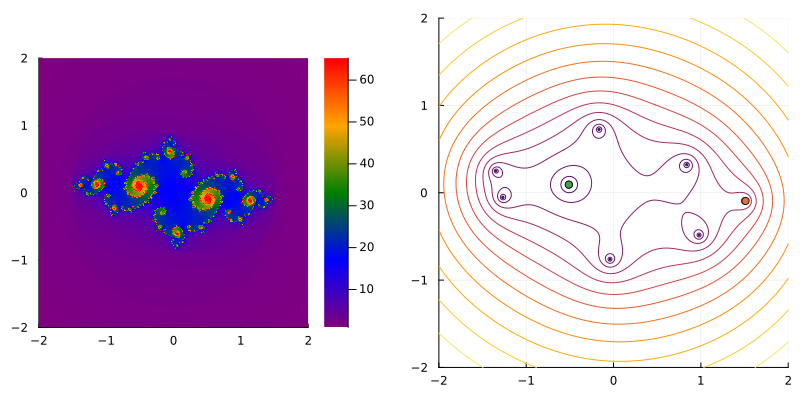

In [10]:
function f(z, c, n)
    for i = 1:n
        z = f(z,c)
    end
    z
end

n = 3
orbiterror(z,c,n) = log10(abs(f(z, c, n) - z))
orberr = [orbiterror(a + b*im, c,n) for b in imaggrid, a in realgrid]

contour(realgrid, imaggrid, orberr, aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="", colorbar=:none)
fig6 = scatter!(real(roots), imag(roots), aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="")
plot(fig1,fig6,size=(800,400))

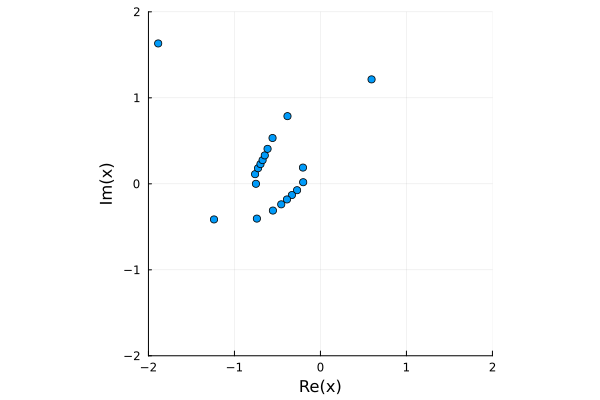

In [11]:
z0 = roots[2]*(1.1)
z0 = -0.75 + 0im
N = 256
z = fill(z0, N)
for n = 1:N-1
    z[n+1] = f(z[n], c)
end

scatter(z, aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="")